In [ ]:
! pip install PyPDF2


In [ ]:
import os
import zipfile
import PyPDF2
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')


1- Extraction of zip files

In [5]:
data_path = "../Data/Data"
zip_files = os.listdir(data_path)

for zip_file in zip_files:
    with zipfile.ZipFile(os.path.join(data_path, zip_file), 'r') as zip_ref:
        zip_ref.extractall(data_path)


2- Get some information about PDFs

In [17]:
new_data_path = data_path + "/PDFs"
extracted_files = os.listdir(new_data_path)
print(f"number of PDFs in total = {len(extracted_files)}")


number of PDFs in total = 997


3- Let's create a function to extract the text from PDF

In [22]:
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ""
        for page_number in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page_number].extract_text()
    return text


We apply this function on a random file

In [30]:
example_file_path = os.path.join(new_data_path, extracted_files[1])
document_name = os.path.basename(example_file_path)

text_content = extract_text_from_pdf(example_file_path)
print(f"{document_name=}")
print(text_content)


document_name='6945.pdf'
Wheaton College  
Cisco 6945 Phone and Voicemail User Guide  
 
Revised 1/30/2013   Page 1 
     
Phone Features  
1. Handset light strip  10. Speakerphone button  
2. Phone display  11. Keypad  
3. Programmable feature buttons  12. Mute button  
4. Softkey buttons  13. Volume button  
5. Transfer button  14. Messages button  
6. Conference button  15. Applications button  
7. Hold button  16. Contacts button  
8. Navigation bar and Select button  17. Handset  
9. Headset button   
 
 
Downloaded from www.Manualslib.com  manuals search engine  Wheaton College  
Cisco 6945 Phone and Voicemail User Guide  
 
Revised 1/30/2013   Page 2 
     
General Things To Know Up Front  
 To dial off -campus, simply dial 1 + area code + number .    
 In an emergency you can dial:  
o 5911 to reach Public Safety  
o 911 to reach DuPage Public Safety Communications (DU -COMM)*  
 * IMPORTANT: If you accidently dial 911 DO NOT  hang up. Simply wait on the line until they answer 

4- Have an idea about the number of words/sentences in a document

In [31]:
word_count = len(text_content.split())
sentence_count = text_content.count('.') + text_content.count('!') + text_content.count('?')

print(f"{word_count=}")
print(f"{sentence_count=}")


word_count=2794
sentence_count=103


5- A little bit of data vizualisation

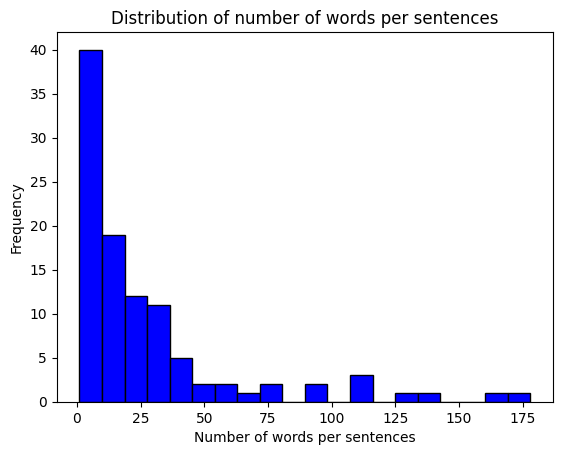

In [62]:
# Number of words per sentences
words_per_sentence = [len(sentence.split()) for sentence in text_content.split('.') if sentence.strip()]
plt.hist(words_per_sentence, bins=20, color='blue', edgecolor='black')
plt.xlabel('Number of words per sentences')
plt.ylabel('Frequency')
plt.title('Distribution of number of words per sentences')
plt.show()


On average, sentences are relatively shorts with less that 25 words

In [72]:
# We remove the stopwords
tokens = word_tokenize(text_content.lower())
element_to_remove = [".", ",", "\uf0a7", "“", "”", "(", ")", "–"]
filtered_tokens = [word for word in tokens if word.lower() not in
                   (stopwords.words('english') + element_to_remove)]


# Display the most frequent words
word_freq = Counter(filtered_tokens)
print(word_freq.most_common(10))


[('call', 62), ('phone', 50), ('press', 41), ('button', 38), ('softkey', 22), ('number', 22), ('dial', 21), ('message', 20), ('conference', 17), ('calls', 16)]


Ok, it seems that we are capable of extract some interesting data from the PDFs. 
Next step -> See the notebook "data cleaning and preprocessing"